# Machine Learning & K-Nearest Neighbors

K-Nearest Neighbors is a **supervised learning** method that predicts the category of a new sample based on the most common category of its neighbors.  The number of nearest neighbors considered is given the label K.

The examples in today's notebook are drawn from a couple of examples: [1](https://github.com/justmarkham/DAT8/blob/master/notebooks/08_knn_sklearn.ipynb) and [2](https://github.com/shoaibb/K-Nearest-Neighbors/blob/master/K-Nearest%20Neighbors.ipynb)

We will be working with the iris data, trying to predict the species of new individual irises based on their measurements.

<img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png' width=600>

<img src='https://i0.wp.com/blog.kaggle.com/wp-content/uploads/2015/04/iris_petal_sepal.png' width=300>



In [ ]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Terminology
* **150 observations** (n=150): each observation is one iris flower
* **4 features** (p=4): sepal length, sepal width, petal length, and petal width
* **Response:** iris species
* **Classification problem** since response is categorical

Next, let's make some scatter plots of our features so that we can see how they are related to the response.

First, some plotting setup.

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Next, we will create a new column in our DataFrame called `species_num` that will be the result of mapping the `species` string to a number.

In [ ]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


Now for the plotting.

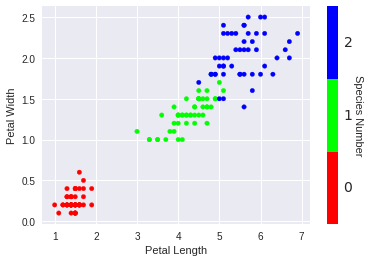

In [ ]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
fig, ax = plt.subplots()
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold, ax=ax)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

f = plt.gcf()
colorbar = f.get_axes()[1]
colorbar.get_yaxis().set_ticks([])
for j, lab in enumerate(['$0$','$1$','$2$']):
    colorbar.text(3.0, (2 * j + 1) / 3.0, lab, ha='left', va='center')
colorbar.get_yaxis().labelpad = 25
colorbar.set_ylabel('Species Number', rotation=270);

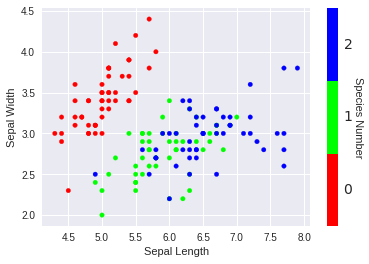

In [ ]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
fig, ax = plt.subplots()
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold, ax=ax)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

f = plt.gcf()
colorbar = f.get_axes()[1]
colorbar.get_yaxis().set_ticks([])
for j, lab in enumerate(['$0$','$1$','$2$']):
    colorbar.text(3.0, (2 * j + 1) / 3.0, lab, ha='left', va='center')
colorbar.get_yaxis().labelpad = 25
colorbar.set_ylabel('Species Number', rotation=270);

## Scikit-learn

We will be using the K-nearest neighbors sorting algorithm provided by `scikit-learn`, a machine learning module.  Scikit-learn's default measure of distance is Euclidean distance, although other distance measures can be selected.


### Requirements for working with data in scikit-learn
Features and response should be separate objects
Features and response should be entirely numeric
Features and response should be NumPy arrays (or easily converted to NumPy arrays)
Features and response should have specific shapes (outlined below)

Let's look again at our data.

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


We will next want to pick out the feature columns of our data and store them together in a matrix.

In [ ]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

Next, we will store the `species_num` data as a vector.

In [ ]:
# store response vector in "y"
y = iris.species_num

In [ ]:
# check X's type
print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
# check y's type
print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
# check X's shape (n = number of observations, p = number of features)
print(X.shape)

(150, 4)


In [ ]:
# check y's shape (single dimension with length n)
print(y.shape)

(150,)


### scikit-learn's 4-step modeling pattern
**Step 1:** Import the class you plan to use

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

In [ ]:
# make an instance of a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=1) # only look at 1 nearest neighbor
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

- We just created an object that "knows" how to do K-nearest neighbors classification, and is just waiting for data
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Occurs in-place (replaces the previous object)

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

- Once a model has been fit with data, it's called a "fitted model"

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [ ]:
print(knn.predict([[3, 5, 4, 2]]))

[2]


- Returns a NumPy array, and we keep track of what the numbers "mean"

We got a species number of 2, which means that K-Nearest neigbors is predicting that our sample is an Iris-virginica.  Look at the scatter plots above.  Does this make sense?

- Can predict for multiple observations at once

In [ ]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
print(knn.predict(X_new))

[2 1]


We can calculate the probabilities for our samples belonging to the different iris classes:

In [ ]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

array([[0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
# Task 1: Suppose you find an iris with measurements [5, 3, 2, 0.5]
# look at the scatter plots above.  What is your prediction for the species
# of this sample based on a visual inspection of the scatter plots
# Type your answer in this cell as a comment.


#Species 0

In [ ]:
# Task 2: Calculate and print the K-nearest neigbors prediction for
# the sample above. Which species is your iris closest to?

print(knn.predict([[5, 3, 2, 0.5]]))

[0]


## Evaluating Perfomance

How well did our K-nearest classifier do?  We don't know at this point!  We asked it to classify some unknown samples but since we don't know what species those samples should be, we cannot see if we got the right answer.  We need samples that we do know the species of to test how well our classifier does.

Often we are not able to collect a second data set.  Standard practice is then to split our data into a training set and an evaluation set.  We train the classifier using the training set and then test on the evaluation set.

### Train Test Split
Use `train_test_split` to split your data into a training set and a testing set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# test_sise=0.3 uses a third of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Create a new model instance that uses 2 nearest neighbors.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)

Fit this KNN model to the training data.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

## Predictions and Evaluations
### Let's evaluate our KNN model!

Use the predict method to predict values using your KNN model and X_test.

In [ ]:
pred = knn.predict(X_test)

Create a confusion matrix and classification report.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  2 10]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      1.00      0.95        20
           2       1.00      0.83      0.91        12

   micro avg       0.96      0.96      0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



### Choosing a K Value
Let's go ahead and do some testing to pick a good K Value!

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. 

In [ ]:
import numpy as np
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now create a plot of the error rate for the different values of k.

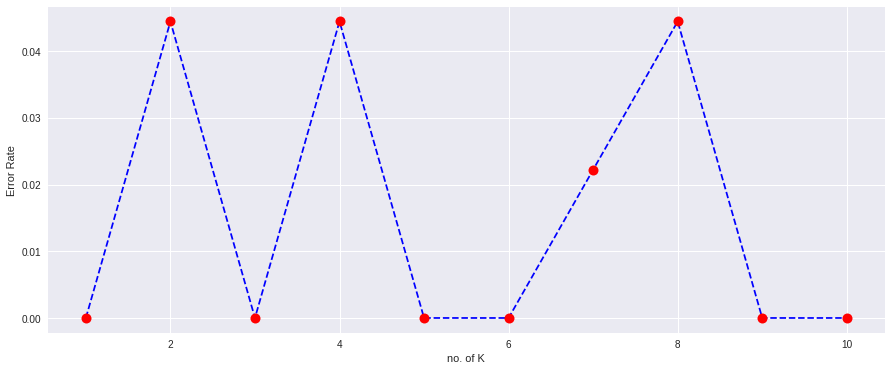

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate');

All of the choices for k result in very low error rates.  Many choices have zero error.  If we chose different training and testing sets from our sample it is likely that different values of k would be optimal than the ones chosen above.  The iris data set is very small so the statistics we can calculate are limited.

In [ ]:
# Task 3: Chose a value of k > 2 and create a knn model.  Train
# the model using the X_train and y_train data.  Create a confusion
# matrix and classification report for your model using X_test and y_test
from sklearn.model_selection import train_test_split


In [ ]:
# test_sise=0.3 uses a third of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
pred = knn1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, pred))

[[32  0  0]
 [ 0 32  0]
 [ 0  5 21]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.86      1.00      0.93        32
           2       1.00      0.81      0.89        26

   micro avg       0.94      0.94      0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



In [ ]:
import numpy as np
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

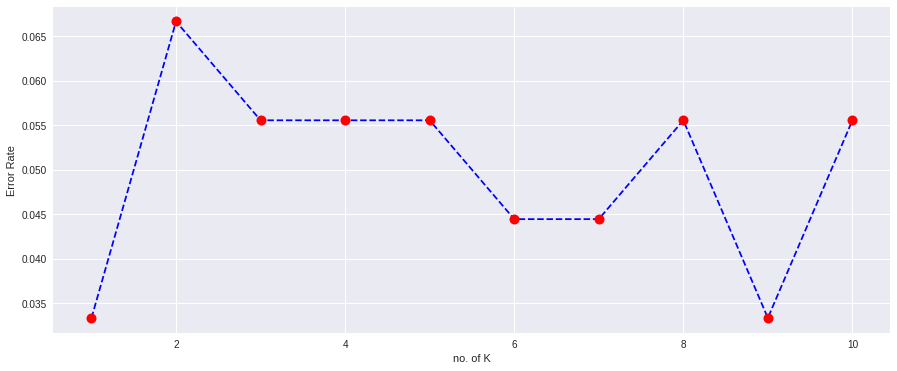

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate');

## Breast Cancer Data

Now, we will look at a bigger data set.  The Wisconsin Breast Cancer data set was collected by physicians at the University of Wisconsin.  It contains information on suspicous breast tissue lumps that were removed for biopsy.  The features of the data set are described in the table below and you can learn more about the data set [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

|  # | Attribute                   |  Domain |
|  --|: ---------------------------|:--------------|
|   1| Sample code number          |  id number |
|   2| Clump Thickness             |  1 - 10 |
|   3| Uniformity of Cell Size     |  1 - 10 |
|   4| Uniformity of Cell Shape    |  1 - 10 |
|   5| Marginal Adhesion           |  1 - 10 |
|   6| Single Epithelial Cell Size |  1 - 10 |
|   7| Bare Nuclei                 |  1 - 10 |
|   8| Bland Chromatin             |  1 - 10 |
|   9| Normal Nucleoli             |  1 - 10 |
|  10| Mitoses                     |  1 - 10 |
|  11| Class:                      |  (2 for benign, 4 for malignant) |


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
col_names = ['id_num', 'clump_thk', 'uni_size', 'uni_shape', 'adheasion', 'epith_size',
            'bare_nuc', 'bland_chro', 'norm_nuc', 'mitosis', 'class']
wisc_dat = pd.read_csv(url, header=None, names=col_names)

In [ ]:
wisc_dat.head()

,id_num,clump_thk,uni_size,uni_shape,adheasion,epith_size,bare_nuc,bland_chro,norm_nuc,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
wisc_dat.shape

(699, 11)

In [ ]:
wisc_dat.dtypes

id_num         int64
clump_thk      int64
uni_size       int64
uni_shape      int64
adheasion      int64
epith_size     int64
bare_nuc      object
bland_chro     int64
norm_nuc       int64
mitosis        int64
class          int64
dtype: object

Our data will need some cleaning.  A few of the samples have missing attributes, marked with a '?'.  We will remove these rows.

In [ ]:
wisc_dat = wisc_dat.drop(wisc_dat[wisc_dat.bare_nuc == '?'].index)
wisc_dat.bare_nuc = pd.to_numeric(wisc_dat.bare_nuc)

wisc_dat.shape

(683, 11)

In [ ]:
wisc_dat.dtypes

id_num        int64
clump_thk     int64
uni_size      int64
uni_shape     int64
adheasion     int64
epith_size    int64
bare_nuc      int64
bland_chro    int64
norm_nuc      int64
mitosis       int64
class         int64
dtype: object

The data are clean!  On to the model!

In [ ]:
# store feature matrix in "X"
feature_cols = ['clump_thk', 'uni_size', 'uni_shape', 'adheasion', 'epith_size',
               'bare_nuc', 'bland_chro', 'norm_nuc', 'mitosis']
X = wisc_dat[feature_cols]

In [ ]:
# store response vector in "y"
y = wisc_dat['class']

In [ ]:
# Task4: Use train_test_split to split your data into a training set and a testing set.
# The testing set should be a third of the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
# Task5: Repeat the analysis where you create a for loop that trains various KNN 
# models with different k values, then keep track of the error_rate for each of 
# these models with a list.

import numpy as np
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

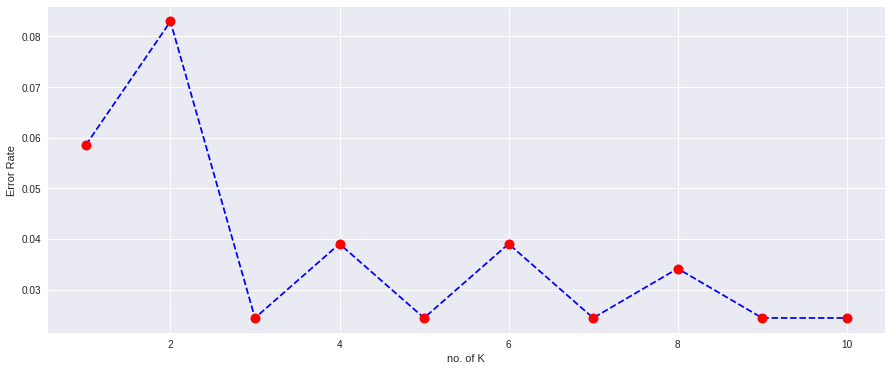

In [ ]:
# Task6: Make a plot of error_rate vs k

plt.figure(figsize=(15,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate');

In [ ]:
# Task7: Select a good value for k and create a knn model.  Train
# the model using the X_train and y_train data.  Create a confusion
# matrix and classification report for your model using X_test and y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[128   2]
 [  3  72]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       130
           4       0.97      0.96      0.97        75

   micro avg       0.98      0.98      0.98       205
   macro avg       0.98      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205

